# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Sa Shea\data-analysis-projects-SaSheaG\eda-checkpoint\Global_Health_Demographics.csv")

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [ ]:
# There is no missing data in the dataset.

df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [ ]:
# I used .describe() to see summary statistics of the data. It appears that the following columns might 
# have outliers:
infant deaths - mean = 32.55, max = 1600.00
percentage expenditure - mean = 698.97, max = 18961.35
Measles - mean = 2224.49, max = 131441.00
under-five deaths - mean = 44.22, max = 2100.00
HIV/AIDS - mean = 1.98, max = 50.60
GDP - mean = 5566.03, max = 119172.74
thinness 1-19 years - mean = 4.85, max = 27.20
thinness 5-9 years - mean = 4.91, max = 28.20


df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


<Axes: ylabel='Frequency'>

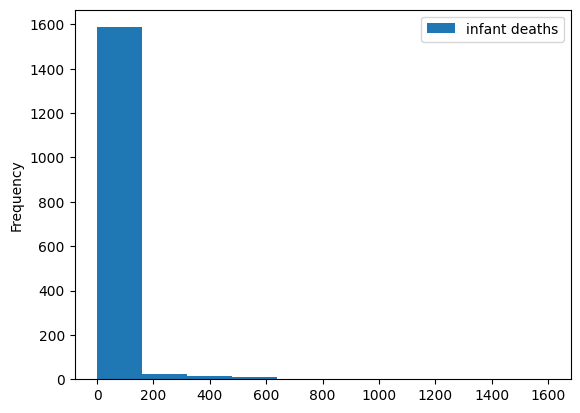

In [7]:
df.plot.hist(column = "infant deaths")

<Axes: xlabel='Year', ylabel='infant deaths'>

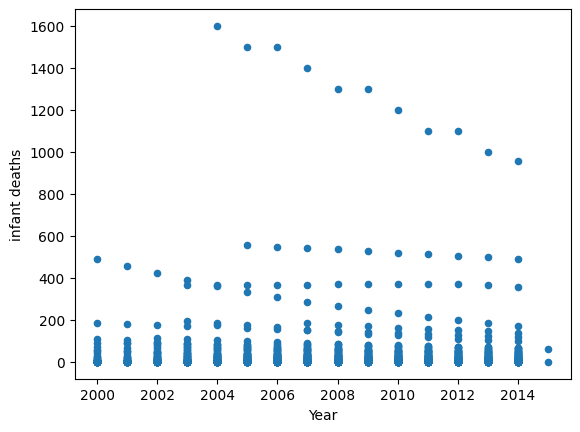

In [9]:
df.plot.scatter(x = "Year", y = "infant deaths")

<Axes: xlabel='Year', ylabel='infant deaths'>

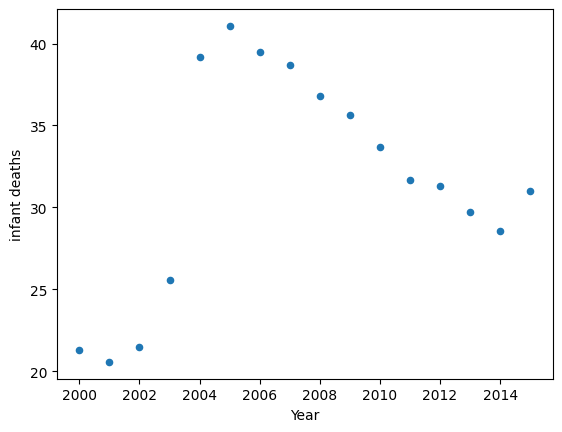

In [8]:
yearly_avg = (
    df.groupby("Year")["infant deaths"]
      .mean()
      .reset_index()
)

yearly_avg.plot.scatter(x = "Year", y = "infant deaths")

Text(0, 0.5, 'Under Age Five Mortality Rate')

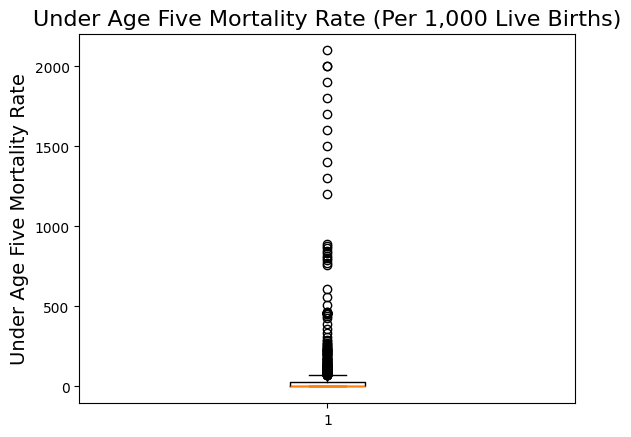

In [11]:
# Creating a box and whisker plot to show outliers in under-five deaths. 

under_five_deaths = df["under-five deaths "] 

plt.boxplot(under_five_deaths)
plt.title("Under Age Five Mortality Rate (Per 1,000 Live Births)", fontsize = 16)
plt.ylabel("Under Age Five Mortality Rate", fontsize = 14)

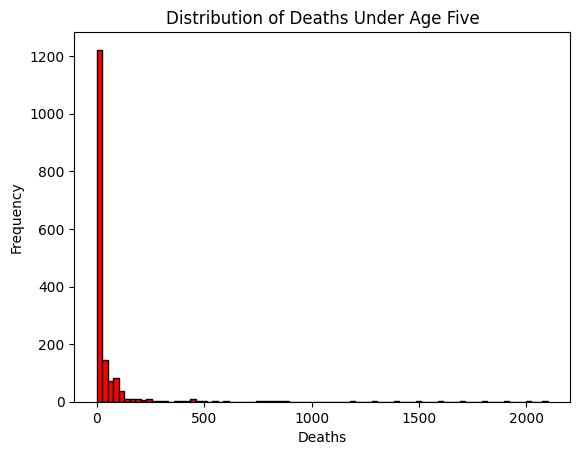

In [18]:
# Creating a histogram plot to distribution of under-five deaths.


plt.hist(df["under-five deaths "], bins = "auto", color = "red", edgecolor="black")
plt.title("Distribution of Deaths Under Age Five")
plt.xlabel("Deaths")
plt.ylabel("Frequency")
plt.show()

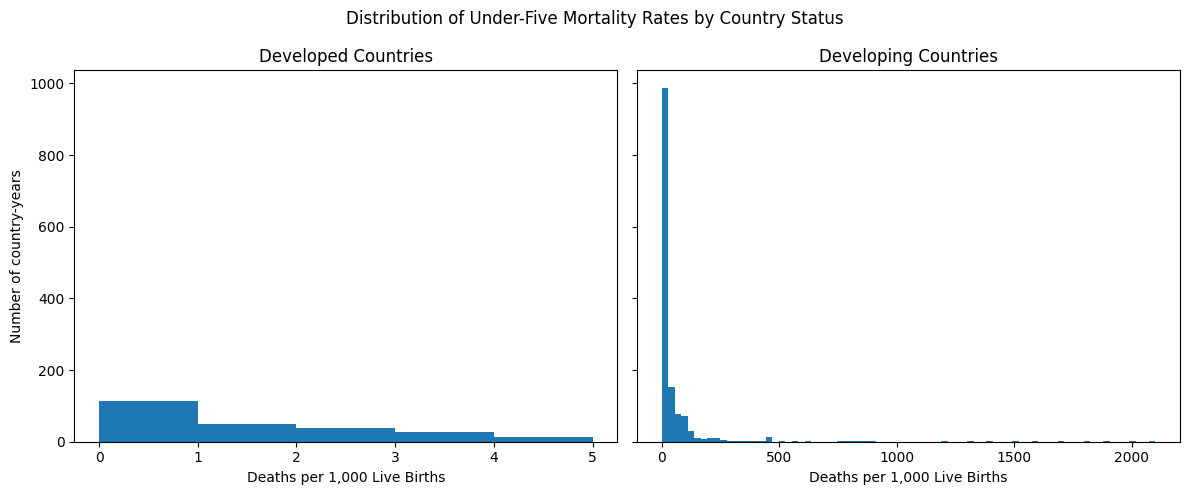

In [19]:
# Histograms of under-five mortality rates for developed vs. developing countries 


developed = df[df["Status"] == "Developed"]["under-five deaths "]
developing = df[df["Status"] == "Developing"]["under-five deaths "]



fig, ax = plt.subplots(1, 2, figsize = (12, 5), sharey = True)

# Developed countries
ax[0].hist(developed, bins = "auto")
ax[0].set_title("Developed Countries")
ax[0].set_xlabel("Deaths per 1,000 Live Births")
ax[0].set_ylabel("Number of country-years")

# Developing countries
ax[1].hist(developing, bins = "auto")
ax[1].set_title("Developing Countries")
ax[1].set_xlabel("Deaths per 1,000 Live Births")

plt.suptitle("Distribution of Under-Five Mortality Rates by Country Status")
plt.tight_layout()
plt.show()


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [ ]:
# All of the data is important and meaningful. Some columns can be removed based on what particular information
# is need to answer the questions being focused on for analysis. 

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [ ]:
# I can see that there is leading and traling space in some of the column headings. 
# There are also inconsistencies in capitalization in the column headings. 

df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
# Removing leading and trailing space in column headings. The updated column headings can be seen below. 

df.columns = df.columns.str.strip()
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [25]:
# Making the first letter of each word in a column name capitalized for consistency.

df.columns = df.columns.str.title()
df.columns


Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'Bmi', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'Hiv/Aids', 'Gdp', 'Population', 'Thinness  1-19 Years',
       'Thinness 5-9 Years', 'Income Composition Of Resources', 'Schooling'],
      dtype='object')

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?